# Trader Behavior vs Market Sentiment Analysis

This notebook analyzes the relationship between **Bitcoin market sentiment (Fear & Greed Index)** and **trader performance** using historical Hyperliquid trade data.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

## 2. Load Datasets

In [2]:
trades = pd.read_csv('historical_data.csv')
sentiment = pd.read_csv('fear_greed_index.csv')
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## 3. Data Cleaning & Preprocessing

In [3]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date
sentiment = sentiment[['date', 'classification']]
sentiment.rename(columns={'classification': 'sentiment'}, inplace=True)

trades[['Timestamp', 'date']].head()

,Timestamp,date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


## 4. Merge Trader Data with Market Sentiment

In [4]:
df = trades.merge(sentiment, on='date', how='inner')
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


## 5. Feature Engineering

In [5]:
df['pnl_category'] = np.where(df['Closed PnL'] > 0, 'Profit', 'Loss')
df['trade_direction'] = df['Side'].str.capitalize()
df['sentiment_binary'] = df['sentiment'].apply(lambda x: 'Fear' if 'Fear' in x else 'Greed')

df[['Closed PnL', 'pnl_category', 'trade_direction', 'sentiment_binary']].head()

,Closed PnL,pnl_category,trade_direction,sentiment_binary
0,0.0,Loss,Buy,Greed
1,0.0,Loss,Buy,Greed
2,0.0,Loss,Buy,Greed
3,0.0,Loss,Buy,Greed
4,0.0,Loss,Buy,Greed


## 6. Trader Performance vs Market Sentiment

In [6]:
performance = df.groupby('sentiment_binary')['Closed PnL'].agg(
    avg_pnl='mean', median_pnl='median', total_trades='count')

win_rate = df.groupby('sentiment_binary')['pnl_category'].apply(
    lambda x: (x == 'Profit').mean() * 100)

performance['win_rate_%'] = win_rate
performance

,avg_pnl,median_pnl,total_trades,win_rate_%
sentiment_binary,,,,
Fear,50.047622,0.0,133871,41.514592
Greed,69.958017,0.0,50392,43.417606


## 7. PnL Distribution

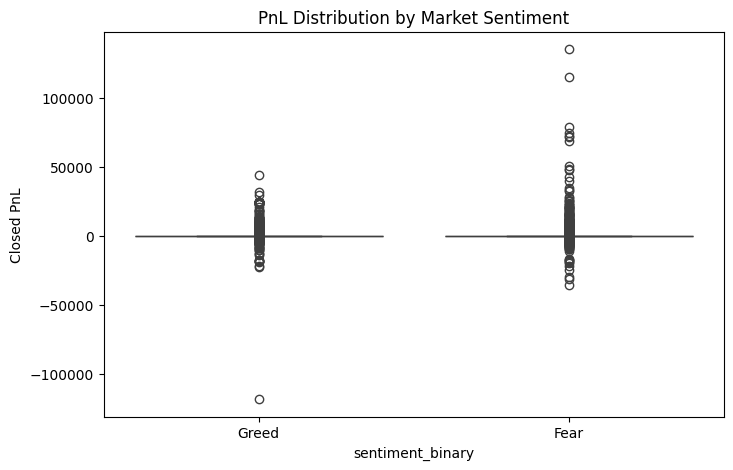

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='sentiment_binary', y='Closed PnL')
plt.title('PnL Distribution by Market Sentiment')
plt.show()

## 8. Trade Direction Bias

In [8]:
direction_dist = pd.crosstab(df['sentiment_binary'], df['trade_direction'], normalize='index') * 100
direction_dist

trade_direction,Buy,Sell
sentiment_binary,,
Fear,49.361699,50.638301
Greed,44.247103,55.752897


## 9. Account-Level Performance

In [9]:
account_perf = df.groupby(['Account', 'sentiment_binary'])['Closed PnL'].sum().unstack()
account_perf.head()

sentiment_binary,Fear,Greed
Account,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1.927736e+06,-327505.900056
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1.709873e+04,20607.446093
0x271b280974205ca63b716753467d5a371de622ab,2.997093e+04,1792.160215
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.043510e+04,121880.386016
0x2c229d22b100a7beb69122eed721cee9b24011dd,1.164123e+05,52215.729448


## 10. Save Final Dataset

In [10]:
df.to_csv('merged_trader_sentiment_data.csv', index=False)